<b>Описание проекта</b><br>

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.<br>
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.<br><br>
<b>Описание тарифов</b>

<b>Тариф «Смарт»</b><br>
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.<br><br>
<b>Тариф «Ультра»</b><br>
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.<br><br>
<b>Примечание:</b><br>
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

# Оглавление:
1. [Шаг_1](#Шаг_1)
Открытие файла и изучение информации
    1. [Вывод_1:](#Вывод_1:)
2. [Шаг_2](#Шаг_2)
Подготовка данных
    1. [Вывод_2:](#Вывод_2:)
3. [Шаг_3](#Шаг_3)
Анализ данных
    1. [Вывод_3:](#Вывод_3:)
4. [Шаг_4](#Шаг_4)
Проверка гипотез
    1. [Вывод_4:](#Вывод_4:)
5. [Шаг_5](#Шаг_5)
Общий_вывод
    1. [Общий_вывод:](#Общий_вывод:)



## Шаг_1 <a name="Шаг_1"></a>
Откройте файл с данными и изучите общую информацию


### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
from functools import reduce

In [2]:
df_calls_1 = pd.read_csv('calls.csv', sep=',')
df_internet_1 = pd.read_csv('internet.csv', sep=',')
df_messages_1 = pd.read_csv('messages.csv', sep=',')
df_tariffs_1 = pd.read_csv('tariffs.csv', sep=',')
df_users_1 = pd.read_csv('users.csv', sep=',')

Создам копии таблиц и все действия в процессе работы над проектом буду производить с ними. 

In [3]:
df_calls = df_calls_1.copy()
df_internet = df_internet_1.copy()
df_messages = df_messages_1.copy()
df_tariffs = df_tariffs_1.copy()
df_users = df_users_1.copy()

In [4]:
tables = [df_calls, df_internet, df_messages, df_tariffs, df_users]

In [5]:
for i in  tables:
    print(i.info())
    print(i.describe())
    print(i.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
<class 

### Вывод_1:

Таблица df_calls

1) В таблице df_calls значения user_id имеют тип int, мы не можем менять данные значения производить и производить с ними арифметические  действия, кроме подсчеда их количества. Поэтому данный тип изменим на str.

2) колонку call_date приведу к типу datetime

3) Пропусков нет

Таблица df_internet

1) Пропусков нет

2) В таблице df_internet значения user_id имеют тип int, мы не можем менять данные значения производить и производить с ними арифметические  действия, кроме подсчеда их количества. Поэтому данный тип изменим на str.

3) колонку session_date приведу к типу datetime 

4) есть колонка Unnamed, дублирующая значения индекса. Скорее всего, при выгрузке данных столбец с индексами случайно добавили в таблицу. Его следует удалить

Таблица df_messages

1) Пропусков нет

2) В таблице df_messages значения user_id имеют тип int, мы не можем менять данные значения производить и производить с ними арифметические  действия, кроме подсчеда их количества. Поэтому данный тип изменим на str.

3) колонку message_date приведу к типу datetime 

Таблица df_tariffs

в таблице, на первый взгляд, с данными все хорощо

Таблица df_users

1) также следует поменять тип колонки user_id

2) все колонки с датами привести к типу datetime

3) пропуски есть только в одной колонке churn_date, и они означают, что тарифом еще пользовались на момент выгрузки данных




  
    

## Шаг_2 <a name="Шаг_2"></a>
Подготовьте данные




Приведите данные к нужным типам;

Найдите и исправьте ошибки в данных, если они есть.

Поясните, какие ошибки вы нашли и как их исправили.

В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Посчитайте для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [6]:
def to_str(a):
    return a.astype(str) 
def to_datetime(a):
    return pd.to_datetime(a)

Изменю тип данных столбца user_id с int на str во всех таблицах 

In [7]:
users_columns = [df_calls, df_internet, df_messages, df_users]
for i in users_columns:
    i['user_id'] = i['user_id'].astype('str')

преобразую все данные с датами к типу datetime

In [8]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

проверка

In [9]:
date_columns = [df_calls['call_date'], df_internet['session_date'], df_messages['message_date'], df_users['reg_date'], df_users['churn_date']] 
for i in date_columns:
    print(i.dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


округлю данные по звонкам до следующего целого числа

In [10]:
df_calls['duration'] = np.ceil(df_calls['duration'])

добавлю в колонки с номером месяца 

In [11]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

In [12]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

In [13]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

для таблиц с данными по звонкам, трафику и сообщениям определю по месяцам количество и сумму, интересующих нас данных. 

In [14]:
calls_month = df_calls.groupby(['user_id', 'month'], as_index=False).agg({'duration': ['count', 'sum']})
calls_month.columns = ['_'.join(col).rstrip('_') for col in calls_month.columns.values]

In [15]:
messages_month = df_messages.groupby(['user_id', 'month'], as_index=False).agg({'id': 'count'})
messages_month.columns = ['user_id','month','count']

In [16]:
internet_month = df_internet.groupby(['user_id', 'month'], as_index=False).agg({'mb_used': ['count', 'sum']})
internet_month.columns = ['_'.join(col).rstrip('_') for col in internet_month.columns.values]

объединю полученные таблицы с таблицей тарифов, меня интересуют колонки с названием тарифа и города

In [17]:
df_calls_users_merge = calls_month.merge(df_users[['tariff', 'user_id', 'city']], on='user_id', how='left')
df_calls_users_merge.columns = ['user_id','month','duration_count','duration_sum','tariff_name','city']
df_calls_users_merge.head()

,user_id,month,duration_count,duration_sum,tariff_name,city
0,1000,5,22,159.0,ultra,Краснодар
1,1000,6,43,172.0,ultra,Краснодар
2,1000,7,47,340.0,ultra,Краснодар
3,1000,8,52,408.0,ultra,Краснодар
4,1000,9,58,466.0,ultra,Краснодар


In [18]:
df_messages_users_merge = messages_month.merge(df_users[['tariff', 'user_id', 'city']], on='user_id', how='left')
df_messages_users_merge.columns = ['user_id','month','sms_count','tariff_name','city']
df_messages_users_merge.head()

,user_id,month,sms_count,tariff_name,city
0,1000,5,22,ultra,Краснодар
1,1000,6,60,ultra,Краснодар
2,1000,7,75,ultra,Краснодар
3,1000,8,81,ultra,Краснодар
4,1000,9,57,ultra,Краснодар


In [19]:
df_internet_users_merge = internet_month.merge(df_users[['tariff', 'user_id', 'city']], on='user_id', how='left')
df_internet_users_merge.columns = ['user_id','month','mb_used_count','mb_used_sum','tariff_name','city']
df_internet_users_merge.head()

,user_id,month,mb_used_count,mb_used_sum,tariff_name,city
0,1000,5,5,2253.49,ultra,Краснодар
1,1000,6,49,23233.77,ultra,Краснодар
2,1000,7,29,14003.64,ultra,Краснодар
3,1000,8,29,14055.93,ultra,Краснодар
4,1000,9,27,14568.91,ultra,Краснодар


объединю полученные таблицы с данными из таблицы тарифов по названию тарифа

In [20]:
df_calls_users_tar_merge = df_calls_users_merge.merge(df_tariffs[['tariff_name','minutes_included', 'rub_per_minute']],  on='tariff_name', how='left')

In [21]:
df_message_users_tar_merge = df_messages_users_merge.merge(df_tariffs[['tariff_name','messages_included', 'rub_per_message']],  on='tariff_name', how='left')

In [22]:
df_internet_users_tar_merge = df_internet_users_merge.merge(df_tariffs[['tariff_name','mb_per_month_included', 'rub_per_gb']],  on='tariff_name', how='left')

In [23]:
data_frames = [df_calls_users_merge, df_messages_users_merge, df_internet_users_merge]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames)

In [24]:
df_merged.head()

,user_id,month,duration_count,duration_sum,tariff_name_x,city_x,sms_count,tariff_name_y,city_y,mb_used_count,mb_used_sum,tariff_name,city
0,1000,5,22.0,159.0,ultra,Краснодар,22.0,ultra,Краснодар,5.0,2253.49,ultra,Краснодар
1,1000,6,43.0,172.0,ultra,Краснодар,60.0,ultra,Краснодар,49.0,23233.77,ultra,Краснодар
2,1000,7,47.0,340.0,ultra,Краснодар,75.0,ultra,Краснодар,29.0,14003.64,ultra,Краснодар
3,1000,8,52.0,408.0,ultra,Краснодар,81.0,ultra,Краснодар,29.0,14055.93,ultra,Краснодар
4,1000,9,58.0,466.0,ultra,Краснодар,57.0,ultra,Краснодар,27.0,14568.91,ultra,Краснодар


In [25]:
df_merged['city'].loc[df_merged['city'].isna()] = df_merged['city_y'].loc[df_merged['city'].isna()]
df_merged['tariff_name'].loc[df_merged['tariff_name'].isna()] = df_merged['tariff_name_y'].loc[df_merged['tariff_name'].isna()]

In [26]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   object 
 1   month           3214 non-null   int64  
 2   duration_count  3174 non-null   float64
 3   duration_sum    3174 non-null   float64
 4   tariff_name_x   3174 non-null   object 
 5   city_x          3174 non-null   object 
 6   sms_count       2717 non-null   float64
 7   tariff_name_y   2717 non-null   object 
 8   city_y          2717 non-null   object 
 9   mb_used_count   3203 non-null   float64
 10  mb_used_sum     3203 non-null   float64
 11  tariff_name     3214 non-null   object 
 12  city            3214 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 351.5+ KB


In [27]:
df_merged.drop(df_merged[['tariff_name_x', 'city_x', 'tariff_name_y', 'city_y']], axis=1, inplace=True)

In [28]:
colums_n = ['duration_count', 'duration_sum', 'sms_count', 'mb_used_count', 'mb_used_sum']
for i in colums_n:
    df_merged[i].loc[df_merged[i].isna()] = 0

In [29]:
df_merged = df_merged.merge(df_tariffs[['tariff_name','minutes_included', 'rub_per_minute', 'messages_included', 'rub_per_message', 'mb_per_month_included', 'rub_per_gb', 'rub_monthly_fee']],  on='tariff_name', how='left')

единица измерения трафика не однакова: в таблице с описанием тарифа цена указана за гигабайт, а в таблице с фактическим расходом трафика у пользователей в мегабайтах, приведу данные к Гб. 

In [30]:
df_merged['gb_used_sum'] = df_merged['mb_used_sum']/1024
df_merged['gb_used_sum'] = np.ceil(df_merged['gb_used_sum'])
df_merged['gb_per_month_included'] = df_merged['mb_per_month_included']/1024

In [31]:
df_merged.head()

,user_id,month,duration_count,duration_sum,sms_count,mb_used_count,mb_used_sum,tariff_name,city,minutes_included,rub_per_minute,messages_included,rub_per_message,mb_per_month_included,rub_per_gb,rub_monthly_fee,gb_used_sum,gb_per_month_included
0,1000,5,22.0,159.0,22.0,5.0,2253.49,ultra,Краснодар,3000,1,1000,1,30720,150,1950,3.0,30.0
1,1000,6,43.0,172.0,60.0,49.0,23233.77,ultra,Краснодар,3000,1,1000,1,30720,150,1950,23.0,30.0
2,1000,7,47.0,340.0,75.0,29.0,14003.64,ultra,Краснодар,3000,1,1000,1,30720,150,1950,14.0,30.0
3,1000,8,52.0,408.0,81.0,29.0,14055.93,ultra,Краснодар,3000,1,1000,1,30720,150,1950,14.0,30.0
4,1000,9,58.0,466.0,57.0,27.0,14568.91,ultra,Краснодар,3000,1,1000,1,30720,150,1950,15.0,30.0


In [32]:
df_internet_users_tar_merge['gb_used_sum'] = df_internet_users_tar_merge['mb_used_sum']/1024
df_internet_users_tar_merge['gb_used_sum'] = np.ceil(df_internet_users_tar_merge['gb_used_sum'])
df_internet_users_tar_merge['gb_per_month_included'] = df_internet_users_tar_merge['mb_per_month_included']/1024

добавлю необходимые колонки для расчета дополнительных платежей по каждой услуги и рассчитаю их

In [33]:
df_merged['extra_minutes'] = df_merged['duration_sum'] - df_merged['minutes_included']
df_merged['extra_minutes'].loc[df_merged['extra_minutes'] < 0] = 0
df_merged['extra_pay_calls'] = df_merged['extra_minutes'] * df_merged['rub_per_minute']
df_merged.head()

,user_id,month,duration_count,duration_sum,sms_count,mb_used_count,mb_used_sum,tariff_name,city,minutes_included,rub_per_minute,messages_included,rub_per_message,mb_per_month_included,rub_per_gb,rub_monthly_fee,gb_used_sum,gb_per_month_included,extra_minutes,extra_pay_calls
0,1000,5,22.0,159.0,22.0,5.0,2253.49,ultra,Краснодар,3000,1,1000,1,30720,150,1950,3.0,30.0,0.0,0.0
1,1000,6,43.0,172.0,60.0,49.0,23233.77,ultra,Краснодар,3000,1,1000,1,30720,150,1950,23.0,30.0,0.0,0.0
2,1000,7,47.0,340.0,75.0,29.0,14003.64,ultra,Краснодар,3000,1,1000,1,30720,150,1950,14.0,30.0,0.0,0.0
3,1000,8,52.0,408.0,81.0,29.0,14055.93,ultra,Краснодар,3000,1,1000,1,30720,150,1950,14.0,30.0,0.0,0.0
4,1000,9,58.0,466.0,57.0,27.0,14568.91,ultra,Краснодар,3000,1,1000,1,30720,150,1950,15.0,30.0,0.0,0.0


In [34]:
df_merged['extra_messages'] = df_merged['sms_count'] - df_merged['messages_included']
df_merged['extra_messages'].loc[df_merged['extra_messages'] < 0] = 0
df_merged['extra_pay_messages'] = df_merged['extra_messages'] * df_merged['rub_per_message']
df_merged.head()

,user_id,month,duration_count,duration_sum,sms_count,mb_used_count,mb_used_sum,tariff_name,city,minutes_included,...,rub_per_message,mb_per_month_included,rub_per_gb,rub_monthly_fee,gb_used_sum,gb_per_month_included,extra_minutes,extra_pay_calls,extra_messages,extra_pay_messages
0,1000,5,22.0,159.0,22.0,5.0,2253.49,ultra,Краснодар,3000,...,1,30720,150,1950,3.0,30.0,0.0,0.0,0.0,0.0
1,1000,6,43.0,172.0,60.0,49.0,23233.77,ultra,Краснодар,3000,...,1,30720,150,1950,23.0,30.0,0.0,0.0,0.0,0.0
2,1000,7,47.0,340.0,75.0,29.0,14003.64,ultra,Краснодар,3000,...,1,30720,150,1950,14.0,30.0,0.0,0.0,0.0,0.0
3,1000,8,52.0,408.0,81.0,29.0,14055.93,ultra,Краснодар,3000,...,1,30720,150,1950,14.0,30.0,0.0,0.0,0.0,0.0
4,1000,9,58.0,466.0,57.0,27.0,14568.91,ultra,Краснодар,3000,...,1,30720,150,1950,15.0,30.0,0.0,0.0,0.0,0.0


In [35]:
df_merged['extra_gb'] = df_merged['gb_used_sum'] - df_merged['gb_per_month_included']
df_merged['extra_gb'].loc[df_merged['extra_gb'] < 0] = 0
df_merged['extra_pay_gb'] = df_merged['extra_gb'] * df_merged['rub_per_gb']
df_merged.head()

,user_id,month,duration_count,duration_sum,sms_count,mb_used_count,mb_used_sum,tariff_name,city,minutes_included,...,rub_per_gb,rub_monthly_fee,gb_used_sum,gb_per_month_included,extra_minutes,extra_pay_calls,extra_messages,extra_pay_messages,extra_gb,extra_pay_gb
0,1000,5,22.0,159.0,22.0,5.0,2253.49,ultra,Краснодар,3000,...,150,1950,3.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000,6,43.0,172.0,60.0,49.0,23233.77,ultra,Краснодар,3000,...,150,1950,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000,7,47.0,340.0,75.0,29.0,14003.64,ultra,Краснодар,3000,...,150,1950,14.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000,8,52.0,408.0,81.0,29.0,14055.93,ultra,Краснодар,3000,...,150,1950,14.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000,9,58.0,466.0,57.0,27.0,14568.91,ultra,Краснодар,3000,...,150,1950,15.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0


посчитаю выручку для каждого пользователя

In [36]:
df_merged['common_extra_revenue'] = df_merged['extra_pay_calls'] + df_merged['extra_pay_messages'] + df_merged['extra_pay_gb']
df_merged['revenue'] = df_merged['common_extra_revenue'] + df_merged['rub_monthly_fee']

In [37]:
df_merged

,user_id,month,duration_count,duration_sum,sms_count,mb_used_count,mb_used_sum,tariff_name,city,minutes_included,...,gb_used_sum,gb_per_month_included,extra_minutes,extra_pay_calls,extra_messages,extra_pay_messages,extra_gb,extra_pay_gb,common_extra_revenue,revenue
0,1000,5,22.0,159.0,22.0,5.0,2253.49,ultra,Краснодар,3000,...,3.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
1,1000,6,43.0,172.0,60.0,49.0,23233.77,ultra,Краснодар,3000,...,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
2,1000,7,47.0,340.0,75.0,29.0,14003.64,ultra,Краснодар,3000,...,14.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
3,1000,8,52.0,408.0,81.0,29.0,14055.93,ultra,Краснодар,3000,...,14.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
4,1000,9,58.0,466.0,57.0,27.0,14568.91,ultra,Краснодар,3000,...,15.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,63.0,17206.30,smart,Санкт-Петербург,500,...,17.0,15.0,0.0,0.0,0.0,0.0,2.0,400.0,400.0,950.0
3210,1489,10,0.0,0.0,21.0,63.0,19559.44,smart,Санкт-Петербург,500,...,20.0,15.0,0.0,0.0,0.0,0.0,5.0,1000.0,1000.0,1550.0
3211,1489,11,0.0,0.0,20.0,55.0,17491.56,smart,Санкт-Петербург,500,...,18.0,15.0,0.0,0.0,0.0,0.0,3.0,600.0,600.0,1150.0
3212,1489,12,0.0,0.0,35.0,51.0,17322.51,smart,Санкт-Петербург,500,...,17.0,15.0,0.0,0.0,0.0,0.0,2.0,400.0,400.0,950.0


### Вывод_2:



## Шаг_3 <a name="Шаг_3"></a>

### Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. 

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. 

Постройте гистограммы. 

Опишите распределения.

In [38]:
df_step_3_smart = df_merged.query('tariff_name == "smart"')
df_step_3_ultra = df_merged.query('tariff_name == "ultra"')

In [39]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


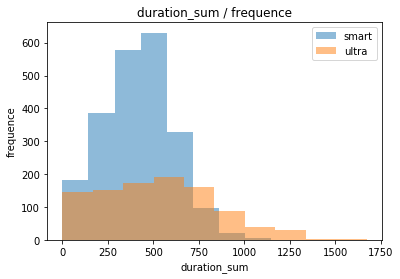

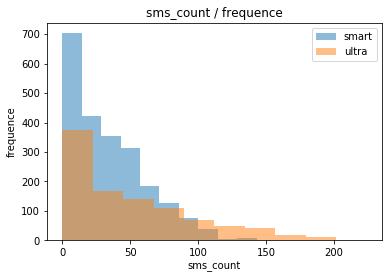

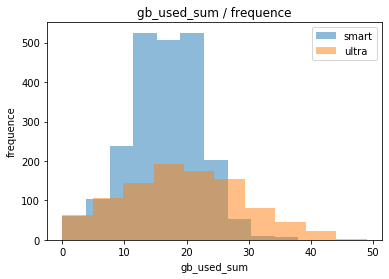

In [40]:
cols_for_hist = ["duration_sum", "sms_count", "gb_used_sum"]
for i in cols_for_hist:
    plt.hist(df_step_3_smart[f'{i}'], alpha=0.5, label='smart')
    plt.hist(df_step_3_ultra[f'{i}'], alpha=0.5, label='ultra')
    plt.legend(loc='upper right')
    plt.title(f'{i} / {"frequence"}')
    plt.xlabel(f'{i}')
    plt.ylabel('frequence')
    plt.show()

### Вывод_3:

У двух тарифов распределения по звонкам, сообщениям и трафику имеют одинаковых характер, так по звонкам получается нормальное распределение со сдвигом влево, по сообщениям - распределение стъюдента, по трафику - нормальное распределение. 

Как видно на графиках, достаточно много абонентов smart превышают лимиты включенных в тариф параметров. В то время как, абоненты тарифа ultra в большинстве случаев не выходят за преределы установленных таририфом параметров. 



## Шаг_4 <a name="Шаг_4"></a>

### Проверьте гипотезы

средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

1. 
нулевая гипотеза: среднее значение выручки по тарифу "smart" по выборке не отличается от среднего по выручке по тарифу "ultra" по выборке.
альтернативная гипотеза: среднее значение выручки по тарифу "smart" по выборке отличается от среднего по выручке по тарифу "ultra" по выборке.



In [41]:
alpha = 0.02
revenue_smart = df_merged.query('tariff_name == "smart"')['revenue'] 
revenue_ultra = df_merged.query('tariff_name == "ultra"')['revenue']
results = st.ttest_ind(revenue_smart, revenue_ultra, equal_var=True)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


In [42]:
(revenue_smart.mean(), revenue_ultra.mean())

(1289.9735307312696, 2070.1522842639592)

2. 
нулевая гипотеза: среднее значение выручки по городу Москва по выборке не отличается от среднего по выручке по другим городам по выборке.
альтернативная гипотеза: среднее значение выручки по городу Москва по выборке отличается от среднего по выручке по другим городам по выборке.

In [43]:
alpha = 0.02
revenue_MSK = df_merged.query('city == "Москва"')['revenue'] 
revenue_other_cities = df_merged.query('city != "Москва"')['revenue']
results = st.ttest_ind(revenue_MSK, revenue_other_cities)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


In [44]:
(revenue_MSK.mean(), revenue_other_cities.mean())

(1546.7135842880523, 1524.9362274298885)

### Вывод_4:

Т.к. выборки не попарные и нас интересует равенство 2-х генеральных совокупностей я использовал st.ttest_ind.

Проведенные вычисления показали, что между выручками по тарифам имеются существенные различия. Также в результате сравнения выяснолось, что между выручкой пользователей из МСК и других городов различия незначительны.

## Шаг_5 <a name="Шаг_5"></a>

### Общий_вывод:

 В ходе исследования были изучены данные абонентов из разных городов для 2-х тарифов. Были построены графики, показывающие распределения данных для каждой услуги. Посчитана выручка по каждой услуги для каждого абонента. Также получены ответы на выдвинутые гипотезы.

 В результате исследования было выявлено, что средняя выручка для абонентов всех городов, использующих тариф 'Smart' меньше аналогичного показателя для тарифа 'Ultra'. 

Также исследование показало, что средние выручки абонентов Москвы и остальных городов сильно не отличаются.

 В то же время, если посмотреть на графики распределения по звонкам, сообщениям и трафику можно увидеть, что большой процент абонентов тарифа smart часто тратит больше, включенного в тариф значения той или иной услуги, на основании этого рекомендую предложить перейти данным клиентам на тариф ultra, что, в итоге, повысит общую выручку для оператора. 